#### 선형회귀 모델로 데이터 적용을 이해하자

평균기온 | 아이스크림 쇼핑 클릭량
--- | ---
5 | 15
10 | 25
15 | 35
20 | ?

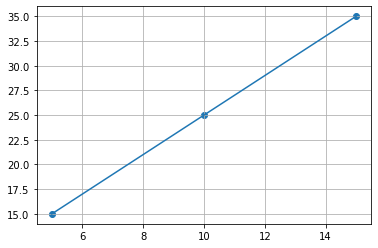

In [8]:
import numpy as np
import matplotlib.pyplot as plt

temp = np.array([5,10,15])
ice = np.array([15,25,35])

plt.plot(temp, ice)
plt.scatter(temp, ice)
plt.grid()
plt.show()

#### 2. 좋은 직선을 찾는 기준, 평균 제곱근 오차(RMSE)

평균기온($X$) | 아이스크림 쇼핑 클릭량($Y$)
--- | ---
5 | 16
10 | 23
15 | 31
20 | 50

- 직선의 방정식 $f_1(X) = 2X + 5$ 라는 생각으로 오차를 구해보자
- 오차값 = 실제값($Y$) - 예측값($f_1(X)$)

In [9]:
X = np.array([5,10,15,20])  # 평균 기온 X
Y = np.array([16,23,31,50])  # 실제 쇼핑 클릭량 Y

f1_x = 2*X + 5
f1_error = Y - f1_x

print(f1_error)
print(np.sum(f1_error))

[ 1 -2 -4  5]
0


입력변수 | 예측값 | 실제값 | 오차값
--- | --- | --- | ---
5 | 15 | 16 | 1
10 | 25 | 23 | -2
15 | 35 | 31 | -4
20 | 45 | 50 | 5

[5 5] [15 16]
[10 10] [25 23]
[15 15] [35 31]
[20 20] [45 50]


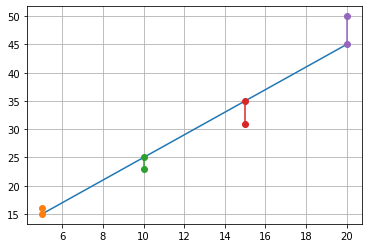

In [12]:
# 그래프 - 예측치의 직선 방정식
plt.plot(X, f1_x)

# 오차값 그려보자
for i in range(len(X)):
    x = np.array([X[i], X[i]])   # 현재 온도
    y = np.array([f1_x[i], Y[i]])   # 실제값과 예측값
    plt.plot(x, y, marker='o')
    print(x, y)

plt.grid()
plt.show()

In [14]:
# 직선의 방정식 f2(X) = 30 라고 생각할 경우 오차를 구해보자
# 오차의 합은 0 이지만 수평 직선은 데이터가 제대로 표현되지 못하고 있다. 

f2_x = np.full((X.shape), 30)
f2_error = Y - f2_x

print(f2_error)
print(np.sum(f2_error))

[-14  -7   1  20]
0


[5 5] [30 16]
[10 10] [30 23]
[15 15] [30 31]
[20 20] [30 50]


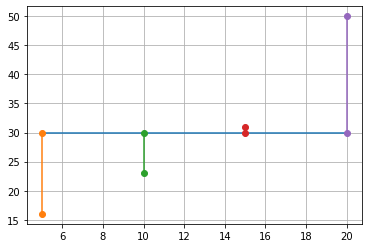

In [15]:
# 새로운 예측 값을 지정 y = 30, 오차의 합은 0
plt.plot(X, f2_x)

# 오차값 그려보자
for i in range(len(X)):
    x = np.array([X[i], X[i]])   # 현재 온도
    y = np.array([f2_x[i], Y[i]])   # 실제값과 예측값
    plt.plot(x, y, marker='o')
    print(x, y)

plt.grid()
plt.show()

In [16]:
# f3(X) = -2X + 55 라고 생각하고 오차를 구해보자
f3_x = -2*X + 55
f3_error = Y - f3_x

print(f3_error)
print(np.sum(f3_error))

[-29 -12   6  35]
0


[5 5] [45 16]
[10 10] [35 23]
[15 15] [25 31]
[20 20] [15 50]


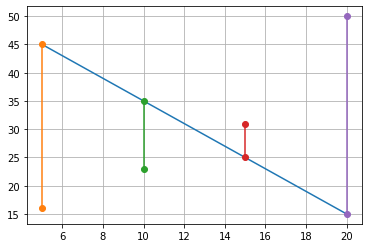

In [17]:
# 새로운 예측값을 지정 -2*X + 55, 오차의 합은  0
plt.plot(X, f3_x)

# 오차값 그려보자
for i in range(len(X)):
    x = np.array([X[i], X[i]])   # 현재 온도
    y = np.array([f3_x[i], Y[i]])   # 실제값과 예측값
    plt.plot(x, y, marker='o')
    print(x, y)

plt.grid()
plt.show()

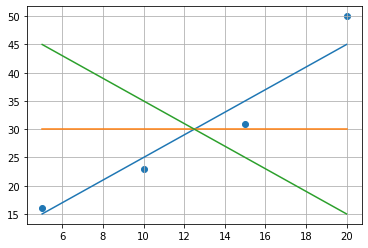

In [18]:
# 3개의 직선을 모두 그려보자
plt.scatter(X,Y)
plt.plot(X, f1_x)
plt.plot(X, f2_x)
plt.plot(X, f3_x)
plt.grid()
plt.show()

정답과 예측치와의 오차 단순 합은 모두 0으로 만들어 사용하기 때문에 어떤 공식을 적용해도 결과 데이터 혹은 데이터 표시 중 어떤 것이 더 좋은지 판단 할 수 없다. 음수의 값으로 예측값 보다 실제값이 작은 값으로 발생할 경우가 생겨난다

이 원인을 가지고 오차의 결과를 양수로 만들어 주는 작업을 하고, 새롭게 제곱들의 평균을 구한 후 이 값의 제곱근 오차를 구한다

RMSE = Root Mean Square Error
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(Y_i - f(X_i))^2}}
$$

In [20]:
def RMSE(a, b, X, y):
    RMSE = np.sqrt(((y-(a*X+b))**2).mean())
    return RMSE

# 처음 지정한 공식 f(x) = 2x + 5  # 첫번째 방식이 에러가 가장 작은값을 리턴해주기 때문에 데이터의 특성을 가장 잘 살렸다고 판단
print(RMSE(2,5,X,Y))

# 두번째 지정한 공식 f(x) = 30
print(RMSE(0,30,X,Y))

# 세번째 지정한 공식 f(x) = -2x + 55
print(RMSE(-2,55,X,Y))

3.391164991562634
12.708265027138834
23.695991222145572


평균제곱근오차와 같이 좋은 직선을 찾기 위해 크기를 최소화해야 하는 값에 대한 함수를 선형회귀 모델의 비용함수(Cost Function)라고 한다.

$$
f(X) = \beta_1X + \beta_0
$$
$$
Cost(\beta_0, \beta_1) = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(Y_i - f(X_i))^2}}
$$

In [22]:
# 온도와 아이스크림 클릭량을 이용해서 데이터 관계를 살펴보자
# 1. data 행렬로 구현해서 출력해보자
import csv

f = open('res_ice.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)   # 헤더 처리(['날짜', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '아이스크림/빙수'])

temp = []   # 평균 기온 데이터 저장소
ice = []   # 아이스크림 쇼핑 데이터 저장

for row in data:
    temp.append(float(row[1]))
    ice.append(int(row[4]))
    
print(temp)
print(ice)

[-2.1, -2.5, -2.1, -0.7, 0.2, -1.3, -0.5, -0.7, -2.9, 0.5, 2.1, 3.0, 1.3, 1.0, 0.9, -3.2, 0.4, 0.8, 2.9, 1.6, 0.5, 2.6, 3.1, 0.7, -0.4, -1.8, -0.2, 2.6, 0.0, 3.5, 0.3, -1.3, 2.1, 5.6, 2.5, 2.9, 5.6, 2.1, -2.0, -1.7, -1.4, -0.8, 0.1, 0.3, 0.6, 2.0, -0.3, -0.2, 2.2, 2.9, 2.8, 2.7, 3.9, 5.0, 6.1, 6.0, 5.4, 7.1, 6.8, 6.0, 6.9, 8.7, 8.8, 8.2, 8.8, 6.5, 6.1, 7.9, 7.8, 6.4, 5.8, 3.9, 5.2, 5.8, 5.8, 6.6, 7.5, 10.7, 11.4, 9.8, 5.2, 4.2, 4.7, 7.2, 10.5, 12.8, 10.6, 10.6, 7.2, 5.4, 5.7, 6.7, 7.4, 9.9, 11.7, 11.6, 12.5, 11.8, 9.3, 7.2, 8.8, 10.7, 11.6, 10.2, 11.1, 14.2, 15.5, 15.3, 12.8, 14.7, 16.5, 17.6, 16.8, 17.3, 13.5, 9.4, 11.4, 12.1, 11.3, 14.6, 15.4, 16.0, 16.7, 17.6, 18.9, 14.0, 13.9, 15.7, 17.1, 17.6, 18.5, 18.4, 17.9, 19.8, 20.3, 21.4, 21.3, 18.8, 19.5, 17.0, 17.0, 19.2, 20.9, 22.9, 23.3, 23.2, 18.6, 17.8, 19.7, 20.5, 18.6, 18.9, 20.6, 22.0, 23.1, 22.9, 21.1, 18.6, 20.1, 19.7, 18.3, 18.8, 19.7, 21.2, 20.2, 20.4, 20.2, 21.3, 21.3, 22.2, 23.4, 22.8, 21.7, 21.6, 22.5, 23.6, 21.1, 23.8, 23.6

In [23]:
# 2. 평균 기온과 아이스크림의 최대값, 최소값을 출력해보자
print(max(temp), min(temp))
print(max(ice), min(ice))

28.8 -3.8
100 20


In [26]:
# 3. 평균 기온 값을 기준으로 도수 분포표를 생성하자 (온도, 도수구간) 히스토그램을 그리자
import numpy as np
bins = np.arange(min(temp), max(temp)+5, 5)

hist, bins = np.histogram(temp, bins)   # 히스토그램 계산
print(hist)
print(bins)

[40 63 50 49 57 80 26]
[-3.8  1.2  6.2 11.2 16.2 21.2 26.2 31.2]


In [29]:
# 4. 평균 기온값을 기준으로 아이스크림 구분해서 저장
ice_buy = np.zeros(7)

for i in range(0, len(temp)):  # 평균 기온 데이터 전체 탐색
    if bins[0] <= temp[i] and temp[i] < bins[1]:  # 첫번째 인덱스에 해당한다면 
        ice_buy[0] = ice_buy[0] + ice[i]   # 첫번째 배열값에 해당하는 날짜의 아이스크림 클릭량을 저장하기
        
    elif bins[1] <= temp[i] and temp[i] < bins[2]:
        ice_buy[1] = ice_buy[1] + ice[i]
        
    elif bins[2] <= temp[i] and temp[i] < bins[3]:
        ice_buy[2] = ice_buy[2] + ice[i]
        
    elif bins[3] <= temp[i] and temp[i] < bins[4]:
        ice_buy[3] = ice_buy[3] + ice[i]
        
    elif bins[4] <= temp[i] and temp[i] < bins[5]:
        ice_buy[4] = ice_buy[4] + ice[i]
        
    elif bins[5] <= temp[i] and temp[i] < bins[6]:
        ice_buy[5] = ice_buy[5] + ice[i]
        
    else:
        ice_buy[6] = ice_buy[6] + ice[i]
        
print(ice_buy)


ice_buy02 = np.zeros(7)

for i in range(0, len(temp)):
    for j in range(0, len(bins)):
        if bins[j] <= temp[i] and temp[i] < bins[j+1]:
            ice_buy02[j] = ice_buy02[j] + ice[i]
            
print(ice_buy02)

[1098. 1782. 1469. 1632. 3198. 4337. 1616.]
[1098. 1782. 1469. 1632. 3198. 4337. 1616.]


In [30]:
# 5. 계급별 아이스크림 쇼핑 클릭량의 평균을 구하자
# 평균 기온값 계급별 아이스크림 쇼핑 클릭량을 구하자
ice_buy_a = np.zeros(7)  # 아이스크림 쇼핑 클릭량의 합을 구할 배열

for i in range(0, len(ice_buy)):
    ice_buy_a[i] = ice_buy[i] / hist[i]   # 계급별 아이스크림 쇼핑 클릭량의 평균
    
# 아이스크림 클릭량의 평균을 소수 이하 2자리까지 출력해보자

for i in range(0, len(ice_buy)):
    print('%.2f'% ice_buy_a[i])

27.45
28.29
29.38
33.31
56.11
54.21
62.15


[-3.8  1.2  6.2 11.2 16.2 21.2 26.2 31.2]


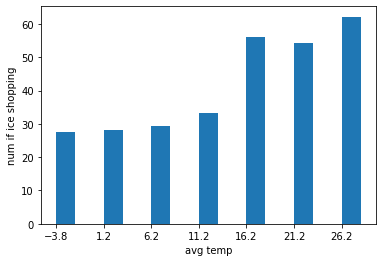

In [33]:
# 6. 평균 기온에 따른 아이스크림 클릭량의 평균을 막대 그래프로 그리자
import matplotlib.pyplot as plt

print(bins)
plt.xlabel('avg temp')
plt.ylabel('num if ice shopping')
plt.bar(bins[0:7], ice_buy_a, width=2, align='edge')

plt.xticks(bins[0:7])
plt.show()

[-3.8  1.2  6.2 11.2 16.2 21.2 26.2 31.2]


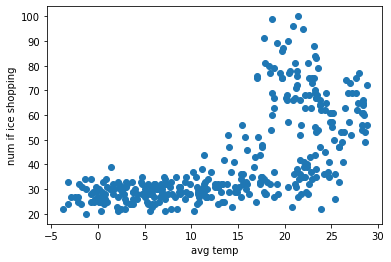

In [34]:
# 6. 평균 기온에 따른 아이스크림 클릭량의 평균을 막대 그래프로 그리자
import matplotlib.pyplot as plt

print(bins)
plt.xlabel('avg temp')
plt.ylabel('num if ice shopping')
plt.scatter(temp, ice)
plt.show()

In [36]:
# 7. 데이터 학습, 평가 데이터 분리하기
import pandas as pd

# 데이터로드
df = pd.read_csv('res_ice.csv', encoding='euc-kr')
df

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),아이스크림/빙수
0,2019-01-01,-2.1,-5.8,2.1,27
1,2019-01-02,-2.5,-7.0,3.2,27
2,2019-01-03,-2.1,-7.7,5.0,25
3,2019-01-04,-0.7,-7.3,5.3,25
4,2019-01-05,0.2,-4.6,5.3,26
...,...,...,...,...,...
360,2019-12-27,0.6,-3.2,5.1,24
361,2019-12-28,0.5,-4.9,7.5,25
362,2019-12-29,2.6,-2.4,6.6,29
363,2019-12-30,5.0,0.1,9.8,28


In [37]:
# step01) 학습데이터의 입출력 변수 나누기
data = np.array(df)
data

array([['2019-01-01', -2.1, -5.8, 2.1, 27],
       ['2019-01-02', -2.5, -7.0, 3.2, 27],
       ['2019-01-03', -2.1, -7.7, 5.0, 25],
       ...,
       ['2019-12-29', 2.6, -2.4, 6.6, 29],
       ['2019-12-30', 5.0, 0.1, 9.8, 28],
       ['2019-12-31', -3.8, -6.7, 0.4, 22]], dtype=object)

In [41]:
X = data[:,1]
y = data[:,-1]

# step02) 비용을 계산하고 업데이트
mean_x = np.mean(X)
mean_y = np.mean(y)

# X 변수가 가진 개수
n = len(X)

# 최소 제곱범 beta0, beta1
temp01 = 0
temp02 = 0

for i in range(n):
    temp01 += (X[i] - mean_x) * (y[i] - mean_y)
    temp02 += (X[i] - mean_x) ** 2
    
beta1 = temp01 / temp02
beta0 = mean_y - (beta1 * mean_x)

print('기울기(beta1) : {0}, 절편(beta0) : {1}'.format(beta1, beta0))

기울기(beta1) : 1.3695501118896156, 절편(beta0) : 22.845160616391098


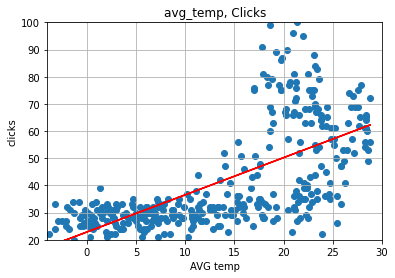

In [43]:
# step03) 시각화
y_pred = beta0 + beta1*X
plt.title('avg_temp, Clicks')
plt.xlabel('AVG temp')
plt.ylabel('clicks')

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.axis([-4,30,20,100])
plt.grid()
plt.show()

In [54]:
# 데이터 학습, 평가 데이터로 분리
import pandas as pd
df = pd.read_csv('res_ice.csv', encoding='euc-kr')

# 학습 데이터를 입력 변수, 출력 변수 나누기
data = np.array(df)
X = data[:,1]
y = data[:,-1]

# 비용을 계산하고 업데이트
mean_x = np.mean(X)
mean_y = np.mean(y)

# X 변수가 가진 개수
n = len(X)

# 최소 제곱범 beta0, beta1
temp01 = 0
temp02 = 0

for i in range(n):
    temp01 += (X[i] - mean_x) * (y[i] - mean_y)
    temp02 += (X[i] - mean_x) ** 2
    
beta1 = temp01 / temp02
beta0 = mean_y - (beta1 * mean_x)

# beta1 = 100
# beta0 = 200

print(beta1)
print(beta0)

# 오차율 -> 손실금액 평가하기
def RMSE(beta0,beta1,x,y):
    RMSE = np.sqrt(((y-(beta0 + beta1*x))**2).mean())
    return RMSE

res = RMSE(beta0, beta1, X, y)
print('손실값 결과는? {0}'.format(res))

# 문제 해결하기
def MyRegression(beta0, beta1, X):
    y_pred = beta0 + beta1*x
    return y_pred

my_res = float(input('오늘의 기온은? 입력해주세요 : '))

predicted_value = MyRegression(beta0, beta1, my_res)
print('오늘 아이스크림 클릭수는 100점을 기준으로 {0} 만큼 예상된다.'.format(predicted_value))

1.3695501118896156
22.845160616391098
손실값 결과는? 13.932934996027768
오늘의 기온은? 입력해주세요 :-9
오늘 아이스크림 클릭수는 100점을 기준으로 [50.23616285 50.23616285] 만큼 예상된다.


In [74]:
# res_ice.cvs를 이용해서 모델링을 구현하고 예측률도 확인하고 지표도 확인해보자
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *

# 1단계. 데이터로드
df = pd.read_csv('res_ice.csv', encoding='euc-kr')

# 2단계. 전처리
data = np.array(df)
X = data[:,1].reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# 3단계 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 4단계 모델링
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5단계 예측률
res_sqr = mean_squared_error(y_test, y_pred)
res_abs = mean_absolute_error(y_test,y_pred)
print('절대 평균 오차 : ', res_abs)
print('제곱 평균 오차 :', res_sqr)

# 6단계
my_res = float(input('오늘의 기온은? 입력해주세요 : '))

predicted_value = model.predict([[my_res]])
print('오늘 아이스크림 클릭수는 100점을 기준으로 {0} 만큼 예상된다.'.format(predicted_value))

절대 평균 오차 :  10.8138223787931
제곱 평균 오차 : 218.83807685665246
오늘의 기온은? 입력해주세요 : 9
오늘 아이스크림 클릭수는 100점을 기준으로 [[35.31481295]] 만큼 예상된다.


In [85]:
# 자료를 병합하고 싶을 때...
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

tt = pd.read_csv('train.csv')

rdf = df.drop(['deck', 'embark_town'], axis=1)
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

tt.columns = map(str.lower, tt.columns)

df2 = pd.concat([ndf, tt['name']], axis=1)
df2

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S,name
0,0,3,22.0,1,0,0,1,0,0,1,"Braund, Mr. Owen Harris"
1,1,1,38.0,1,0,1,0,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,26.0,0,0,1,0,0,0,1,"Heikkinen, Miss. Laina"
3,1,1,35.0,1,0,1,0,0,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,35.0,0,0,0,1,0,0,1,"Allen, Mr. William Henry"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1,0,0,1,"Montvila, Rev. Juozas"
887,1,1,19.0,0,0,1,0,0,0,1,"Graham, Miss. Margaret Edith"
888,0,3,NaN,1,2,1,0,0,0,1,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,1,26.0,0,0,0,1,1,0,0,"Behr, Mr. Karl Howell"
